<a href="https://colab.research.google.com/github/laxmivaishnavee22/OasisInfobyte/blob/main/EDA_retail_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (2).zip


In [ ]:
{'archive.zip': 'application/x-zip-compressed'}


{'archive.zip': 'application/x-zip-compressed'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


📁 Extracted files:

✅ Data Loaded Successfully!
Shape: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100



🔹 Checking for missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

📈 Descriptive Statistics:


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


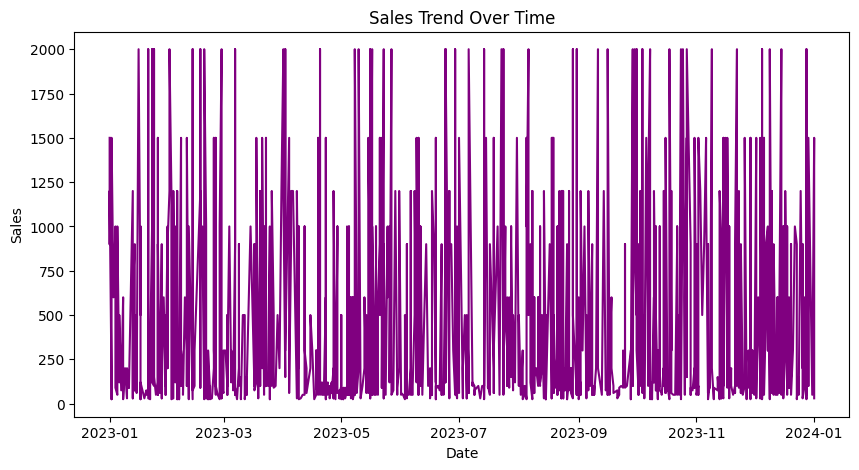

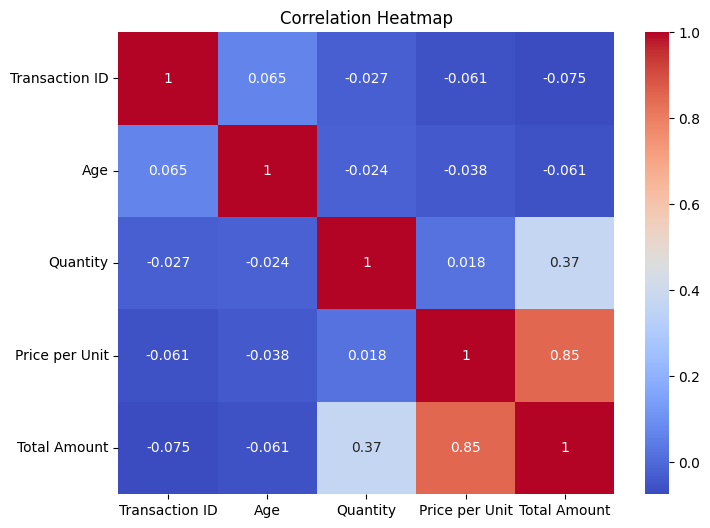


💡 Insights:
- Check which products have consistent sales growth.
- Identify customers contributing most to total sales.
- Analyze low-performing product categories for marketing focus.

✅ EDA Completed Successfully!


from matplotlib import pyplot as plt
_df_36['Transaction ID'].plot(kind='hist', bins=20, title='Transaction ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['Price per Unit'].plot(kind='hist', bins=20, title='Price per Unit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40.plot(kind='scatter', x='Transaction ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='Age', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='Quantity', y='Price per Unit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='Price per Unit', y='Total Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Transaction ID'].plot(kind='line', figsize=(8, 4), title='Transaction ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['Price per Unit'].plot(kind='line', figsize=(8, 4), title='Price per Unit')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
!pip install pandas matplotlib seaborn plotly --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from zipfile import ZipFile
import os

zip_path = "/content/archive.zip"
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/retail_data")

print("📁 Extracted files:")
os.listdir("/content/retail_data")

data_path = "/content/retail_data/retail_sales_dataset.csv"
df = pd.read_csv(data_path)

print("\n✅ Data Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

print("\n🔹 Checking for missing values:")
print(df.isnull().sum())

df = df.drop_duplicates()
df = df.dropna(how='all')

num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

print("\n📈 Descriptive Statistics:")
display(df.describe())

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    plt.figure(figsize=(10,5))
    plt.plot(df['Date'], df['Total Amount'], color='purple')
    plt.title('Sales Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()
else:
    print("\n⚠️ No 'Date' column found — skipping time series analysis.")

if 'CustomerID' in df.columns:
    top_customers = df['CustomerID'].value_counts().head(10)
    sns.barplot(x=top_customers.index, y=top_customers.values)
    plt.title("Top 10 Customers by Purchase Count")
    plt.show()

if 'Product Category' in df.columns:
    top_products = df['Product Category'].value_counts().head(10)
    px.bar(x=top_products.index, y=top_products.values,
           title="Top 10 Selling Products").show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("\n💡 Insights:")
print("- Check which products have consistent sales growth.")
print("- Identify customers contributing most to total sales.")
print("- Analyze low-performing product categories for marketing focus.")

print("\n✅ EDA Completed Successfully!")